 BOW , TF-IDF , Machine Learning Algorithm 
 1- Preprocessing and Cleaning
 2- Train test split ( we do this first so no data is looked by the test , since it will result in almost same train and test data)
 3 - Apply BOW, TFIDF to conver sentences to vectors { Preventing Data leakage }
 4 - apply ML models to train our data and predict or classify

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('spam.csv',  encoding='latin-1')

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3' , 'Unnamed: 4'] , axis=1 , inplace=True)

In [8]:
df.rename(columns={'v1':'Label' , 'v2':'message'} , inplace=True)

In [9]:
df

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [11]:
lemm = WordNetLemmatizer()

In [12]:
# remove punctuation and apply stop words

In [13]:
corpus=[]
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()  # or word.tokenize(review)
    review=[lemm.lemmatize(word, pos='v') for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [14]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune',
 'winner value network customer select receivea prize reward claim call claim code kl valid hours',
 'mobile months u r entitle update latest colour mobiles camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cry enough today',
 'six chance win cash pound txt csh send cost p day days tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',


In [13]:
# ML models to use ( )

In [36]:
y = pd.get_dummies(df['Label'] , dtype=int)

In [37]:
y=y.iloc[:,0]

In [38]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: ham, Length: 5572, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(corpus ,y, test_size=0.2, random_state=42)


In [19]:
len(X_train)

4457

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
bow = CountVectorizer(max_features=2500 , ngram_range=(1,2))

In [22]:
X_train=bow.fit_transform(X_train).toarray()

In [23]:
X_test=bow.transform(X_test).toarray()

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
spam_det = MultinomialNB().fit(X_train,y_train)

In [26]:
spam_det

MultinomialNB()

In [27]:
test_pred = spam_det.predict(X_test)

In [28]:
test_pred

array([1, 1, 0, ..., 1, 1, 0])

In [29]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay

In [30]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       150
           1       0.98      0.99      0.99       965

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [31]:
cm = confusion_matrix(y_test ,test_pred)

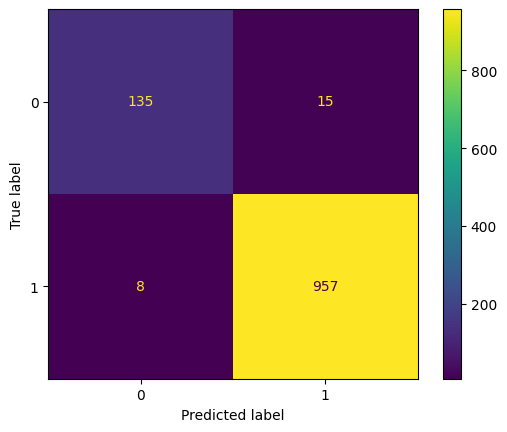

In [32]:
pt=ConfusionMatrixDisplay(cm).plot()

# TF-IDF Vectorizer

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=42)

In [35]:
tf = TfidfVectorizer(max_features=2500 , ngram_range=(1,2))

In [36]:
X_train= tf.fit_transform(X_train).toarray()
X_test = tf.transform(X_test).toarray()

In [37]:
spam_det2 = MultinomialNB().fit(X_train,y_train)

In [38]:
spam_det2

MultinomialNB()

In [39]:
test_pred = spam_det.predict(X_test)

In [40]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       150
           1       0.98      0.99      0.99       965

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# Using Word2vec

In [15]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

In [42]:
wv = api.load('word2vec-google-news-300')

In [43]:
df

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
corpus=[]
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()  # or word.tokenize(review)
    review=[lemm.lemmatize(word, pos='v') for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus,df['message']) if i<1]

[[0, '', '645'], [0, '', ':) '], [0, '', ':-) :-)']]

In [18]:
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there get amore wat',
 'ok lar joke wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he live around here though',
 'freemsg hey there darling it s be week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother be not like to speak with me they treat me like aid patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam have be set as your callertune for all callers press to copy your friends callertune',
 'winner as a value network customer you have be select to receivea prize reward to claim call claim code kl valid hours only',
 'have your mobile months or more u r entitle to update to the latest colour mobiles with camera for free call the mobile upd

In [19]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [20]:
words = []   # other way of preprocessing thr corpus
for sent in corpus:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [21]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'get',
  'amore',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'live',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'be',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'be',
  'not',
  'like',
  'to',
  'speak',


In [22]:
# Lets train the Word2vec from scratch
from gensim.models.word2vec import Word2Vec
model = Word2Vec(words)

In [23]:
# To get all the vocabulary
model.wv.index_to_key

['be',
 'you',
 'to',
 'the',
 'and',
 'in',
 'have',
 'me',
 'my',
 'it',
 'do',
 'for',
 'get',
 'call',
 'your',
 'of',
 'that',
 'go',
 'on',
 'now',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'at',
 'will',
 'if',
 'ur',
 'with',
 'no',
 'just',
 'this',
 'come',
 'gt',
 'lt',
 'how',
 'up',
 'when',
 'ok',
 'what',
 'free',
 'know',
 'from',
 'send',
 'all',
 'out',
 'll',
 'like',
 'time',
 'want',
 'good',
 'love',
 'then',
 'day',
 'there',
 'he',
 'say',
 'its',
 'only',
 'think',
 'tell',
 'take',
 'text',
 'need',
 'win',
 'see',
 'txt',
 'as',
 'make',
 'one',
 'by',
 'stop',
 'don',
 'home',
 'about',
 'she',
 'reply',
 'lor',
 'today',
 'sorry',
 'still',
 'back',
 'da',
 'our',
 'dont',
 'mobile',
 'phone',
 'meet',
 'please',
 'hi',
 'new',
 'work',
 'later',
 'they',
 'her',
 'pls',
 'any',
 'ask',
 'miss',
 'some',
 'give',
 'week',
 'message',
 'dear',
 'here',
 'wait',
 'well',
 're',
 'where',
 'leave',
 'who',
 'much',
 'night',
 'great',
 'claim',
 'an',
 'ho

In [24]:
model.corpus_count

5569

In [25]:
model.epochs

5

In [26]:
model.wv.similar_by_word('good')

[('great', 0.9988279938697815),
 ('day', 0.998817503452301),
 ('night', 0.998769998550415),
 ('mean', 0.9986110329627991),
 ('very', 0.998594343662262),
 ('all', 0.9985542297363281),
 ('and', 0.9985536336898804),
 ('my', 0.9983618855476379),
 ('sleep', 0.998343288898468),
 ('morning', 0.9983386993408203)]

In [27]:
model.wv['good'] # 100 dimensions

array([-0.2085739 ,  0.23384577,  0.14447723,  0.0596437 ,  0.15416574,
       -0.6681264 ,  0.241297  ,  1.0305724 , -0.345588  , -0.21684766,
        0.00458948, -0.411552  , -0.0448306 ,  0.17428201,  0.06313203,
       -0.15259883,  0.18310772, -0.32510814, -0.09115823, -0.6429343 ,
        0.23191772,  0.10136686,  0.30936003, -0.21845399, -0.0508825 ,
        0.08327215, -0.37206802, -0.38499832, -0.2995342 ,  0.06291907,
        0.3641851 ,  0.0172615 ,  0.18553708, -0.37213737, -0.13965906,
        0.422257  , -0.02552983, -0.41992745, -0.24798787, -0.60748154,
       -0.06392398, -0.25391233, -0.1470556 , -0.01743638,  0.34918666,
       -0.09873649, -0.31025845, -0.16034484,  0.19715694,  0.1860319 ,
        0.43285248, -0.43171066, -0.13261738, -0.01731017, -0.1775824 ,
        0.19745742,  0.27746865,  0.08321272, -0.5048867 ,  0.0695776 ,
        0.17049806, -0.0288971 ,  0.05572952,  0.03941202, -0.41888976,
        0.4068244 ,  0.16968516,  0.4276341 , -0.50970304,  0.43

In [28]:
words[0]  # for every word in each sentence there will be 100 dimension corresponding to each word , so we must have only 1 vector of 100 dimension for each sentence thus we use avg word2vec

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'there',
 'get',
 'amore',
 'wat']

In [29]:
def avg_word2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key], axis=0)

In [62]:
 !pip install tqdm

In [30]:
from tqdm import tqdm

In [31]:
# apply for every sentence
X=[]
import numpy as np
for i in  tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

  0%|                                                                                         | 0/5569 [00:00<?, ?it/s]C:\Users\sayan\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sayan\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████████████████████████████████████| 5569/5569 [00:01<00:00, 4050.30it/s]


In [32]:
X_new = np.asarray(X, dtype ='object')

In [33]:
X

[array([-1.4753065e-01,  1.6301307e-01,  1.1052488e-01,  1.5246613e-02,
         1.1617465e-01, -4.5081088e-01,  1.3429828e-01,  6.7572969e-01,
        -2.1408333e-01, -1.4139573e-01,  9.9125467e-03, -2.7092779e-01,
        -3.3486832e-02,  1.0880391e-01,  6.1611556e-02, -1.0094132e-01,
         1.2547228e-01, -2.2106294e-01, -5.3986169e-02, -4.4632429e-01,
         1.4725122e-01,  5.5230636e-02,  1.6782805e-01, -1.3312824e-01,
        -5.4314636e-02,  5.1267680e-02, -2.4459910e-01, -2.4972217e-01,
        -1.9648997e-01,  5.2157324e-02,  2.4085750e-01,  1.6886355e-02,
         9.7865440e-02, -2.4350122e-01, -9.8654427e-02,  2.8635135e-01,
        -1.5546528e-02, -2.7376610e-01, -1.5024123e-01, -4.1560590e-01,
        -2.9839922e-02, -1.7605475e-01, -8.4995762e-02, -2.3563206e-02,
         2.3995529e-01, -9.0067416e-02, -1.9571424e-01, -9.2550240e-02,
         1.3910216e-01,  1.3562569e-01,  2.7696374e-01, -2.8033441e-01,
        -8.4599018e-02,  2.8562464e-04, -1.3617730e-01,  1.64349

In [34]:
df.shape

(5572, 2)

In [35]:
y.shape

NameError: name 'y' is not defined

In [82]:
X_new.shape   # so we see in our original df and output y we have 5572 values , but after preprocessing in X we lose 3 rows

(5569,)

In [40]:
y = df[list(map(lambda x:len(x)>0 , corpus))]
y=pd.get_dummies(y['Label'])
y=y.iloc[:,0]

In [41]:
y.shape

(5569,)

In [99]:
arr = []
for i in range(0,len(X)):
    arr.append(X[i].reshape(1,-1))
    

In [107]:
arr[10].shape

(1, 100)

(100,)

In [108]:
df2 = pd.DataFrame(arr)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (5569, 1) + inhomogeneous part.

In [73]:
df2

,0,1,2,3,4,5,6,7,8,9,...,5559,5560,5561,5562,5563,5564,5565,5566,5567,5568
0,"[-0.14753065, 0.16301307, 0.11052488, 0.015246...","[-0.1613434, 0.16301519, 0.10932079, 0.0191987...","[-0.18503293, 0.1807267, 0.094682485, 0.022445...","[-0.20195769, 0.22442137, 0.16400902, 0.033179...","[-0.17232738, 0.18973505, 0.13768347, 0.019487...","[-0.1893536, 0.20294817, 0.13355325, 0.0270272...","[-0.19084497, 0.20753899, 0.15163742, 0.029870...","[-0.15936492, 0.17344424, 0.1007895, 0.0261201...","[-0.19599524, 0.19856535, 0.10526051, 0.032973...","[-0.2080602, 0.21629107, 0.09952919, 0.0243134...",...,"[-0.16898772, 0.18597579, 0.12862273, 0.023469...","[-0.17778525, 0.20256671, 0.1396021, 0.0194634...","[-0.185971, 0.1993225, 0.13973096, 0.024225235...","[-0.11544523, 0.11597032, 0.07469545, 0.015452...","[-0.21728505, 0.22059336, 0.1211097, 0.0248099...","[-0.200981, 0.21447705, 0.11829826, 0.03661058...","[-0.19979027, 0.20641728, 0.13499475, 0.026234...","[-0.19294201, 0.22038281, 0.1486532, 0.0290401...","[-0.18760274, 0.2075406, 0.1378926, 0.02583730...","[-0.20349693, 0.22084972, 0.14562346, 0.026576..."
